Importing all the necessary libraries and uploading the wav file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import math

In [ ]:
from  google.colab import files
upload= files.upload()

Saving Lab 4.wav to Lab 4.wav


In [ ]:

samplerate, data=wavfile.read("Lab 4.wav")

#Task 1

a.function [ReX,ImX] = myDFT(x)

Task Explanation:
<br>In this case we build our DFT function, which takes one signal in Time Domain as input and returns the frequency domain signals as output. Initially, we took the range value for our signal X, as in frequency domain, the two cosine and sine component have the range length/2+1 we divided it in such a way. After that until the new range, the real and imaginary components were assigned zero. Then after iterating through the new range of real and imaginary component, for each iteration, we took a second loop that runs accorss the original signal, and we assigned them like: cos(theta* component in the tds* component in the fds) for both sine and cosine functions. In this way we got the real and imaginary compoenents of our signal. After that it was compared with my built in DFT function available in numpylibrary, which shows the correctness of my function.

In [ ]:
def myDFT(x):
  range_=len(x)
  length_for_sine_cosine=(range_//2)+1
  Re_X=np.zeros(length_for_sine_cosine)
  Im_X=np.zeros(length_for_sine_cosine)
  theta=2*math.pi*range_

  for k in range((range_//2)+1):
    for i in range(len(x)-1):
      Re_X[k]+= x[i]* math.cos(theta*k*i)
      Im_X[k]+= x[i]*math.sin(theta*k*i)
  print('Using From Scratch Build DFT:\n')
  print(Re_X,'\n', Im_X)
  return Re_X, Im_X
TDS=np.zeros(32)
TDS[0]=32
x,y=myDFT(TDS)
print("\nComparing it with built in DFT function\n")
spectral_analysis2=np.fft.rfft(TDS)
print(spectral_analysis2.real,'\n', spectral_analysis2.imag)



Using From Scratch Build DFT:

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.] 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Comparing it with built in DFT function

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.] 
 [ 0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]


**b. function x = myIDFT(ReX,ImX)**

Task Explanation:
<br>The next function is the inverse of the DFT function. Here from giving the real and imaginary components we build our original time domain signal. As we know that the original length(range in this function) of the time domain signal is twice the range of my signal. Then after iterating through the length of my TDS:  the summation of the real and imaginary compoents were found by dividing it by range/2. It is done due to sprectal density using this formula:
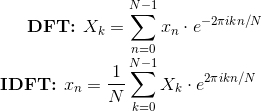
After wards itierating through the range of TDS, for each iteration, another loop was run for FDS, where the real and imaginary component of the signals were added to the TDS. This function is just the exact oppossite of my DFT function.

Using My built in Inverse Transformation:

[ 3.01176471e+01  1.86632762e+00 -1.81879739e+00  1.74138083e+00
 -1.63671428e+00  1.50836201e+00 -1.36069492e+00  1.19874164e+00
 -1.02801728e+00  8.54335662e-01 -6.83611303e-01  5.21658018e-01
 -3.73990930e-01  2.45638666e-01 -1.40972108e-01  6.35555488e-02
 -1.60253179e-02  0.00000000e+00 -1.60253179e-02  6.35555488e-02
 -1.40972108e-01  2.45638666e-01 -3.73990930e-01  5.21658018e-01
 -6.83611303e-01  8.54335662e-01 -1.02801728e+00  1.19874164e+00
 -1.36069492e+00  1.50836201e+00 -1.63671428e+00  1.74138083e+00
 -1.81879739e+00  0.00000000e+00]


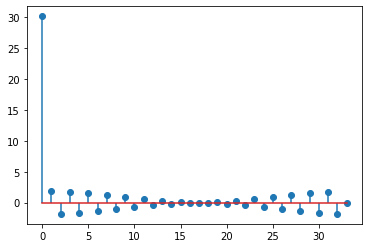

In [ ]:
def myIDFT(Re_x, Im_X):
  Re_X2=np.array(Re_x)
  Im_X2=np.array(Im_X)
  range_=len(Re_x)*2
  x=np.zeros(range_)
  length=(range_//2)

  for k in range(length):
    Re_X2[k]=Re_X2[k]/length
    Im_X2[k]=Im_X2[k]/length

  Re_X2[0]=Re_X2[0]/2
  Re_X2[-1]=Re_X2[-1]/2
  theta=2*math.pi/range_

  for k in range(length):
    for i in range(range_-1):
      x[i]+=Re_X2[k]*math.cos(theta*k*i)
      x[i]+=Im_X2[k]*math.sin(theta*k*i)
  print("Using My built in Inverse Transformation:\n")
  print(x)
  plt.stem(x)
  plt.show()
  return x

TDS=myIDFT(spectral_analysis2.real, spectral_analysis2.imag)



**c. function [MagX, PhaseX] = Rect2Polar(ReX, ImX)**

Task Explanation:
<br> In this task, using the np.multiply function, vectors of the Rex and Imx(the real and imaginary components of the signals) were multiplied to find the corresponding square values. After that the square values were added and the root of them was found using the sqrt function. In case of finding the value of theta, the theta values were kept in a vector. Since, dividing the real and imaginary compoents can result in zero, a small portion of value was added to the imaginary compoent signals to avoid the divide by zero problem. After that using the np.divide the two vectors of real and imaginary compoent were divided. Then for each value in the newly divided function, the arc tan function was used. This function was done in reference to the formula given in book as:
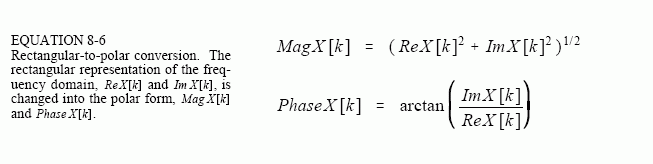

In [ ]:
def Rect2Polar(ReX, ImX):
  #Mg_X=math.sqrt(np.multiply(Re_X*Re_X)+ np.multiply(Im_X*Im_X))
    a=np.multiply(ReX, ReX)
    b=np.multiply(ImX,ImX)
    c=a+b
    c=np.sqrt(c)
    phase_arr=np.zeros(len(c))
    for j in range(len(ImX)):
        ImX[j]+=0.00003
    phase=np.divide(ReX,ImX)
    for i in range(len(phase)):
        phase_arr[i]=np.arctan(phase[i])


    print('The phase values are placed in vectors as:\n');
    print(phase_arr)
    return c

Using From Scratch Build DFT:

[30.13367238 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238
 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238
 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238] 
 [ 0.00000000e+00 -1.77959867e-13 -3.55919734e-13 -4.80852202e-12
 -7.11839467e-13 -7.19135863e-12 -9.61704404e-12  3.68153266e-12
 -1.42367893e-12 -6.45722860e-12 -1.43827173e-11 -3.07262462e-11
 -1.92340881e-11  4.02114687e-11  7.36306531e-12  1.37556364e-11
 -2.84735787e-12  6.87036390e-12]
The phase values are placed in vectors as:

[1.57079533 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533
 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533
 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533]


<Figure size 432x288 with 0 Axes>

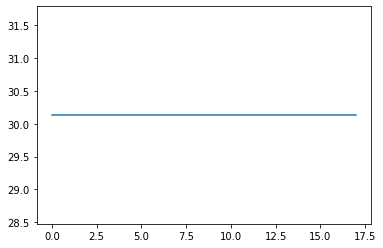

<Figure size 432x288 with 0 Axes>

In [ ]:
ReX, ImX=myDFT(TDS)
MgX= Rect2Polar(ReX, ImX)
plt.plot(MgX)
plt.figure()

#Task 2

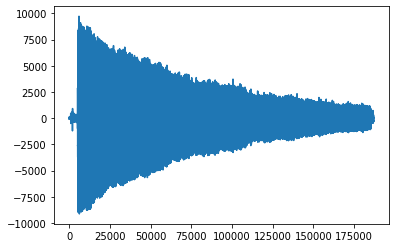

In [ ]:
plt.plot(data)
plt.show()

a. The given audio file Lab 4.wav is a recording of a tuning fork ringing. Tuning forks
have a particular frequency. Plot the signal from the given audio file. Then, do spectral
analysis on the signal to find out what was the frequency of the tuning fork.

Task Explanation:
<br> The built in dft function was called directly, the real_x contains the real part while the imag_x contains the imaginary part. The corresponding signals were plotted as function.

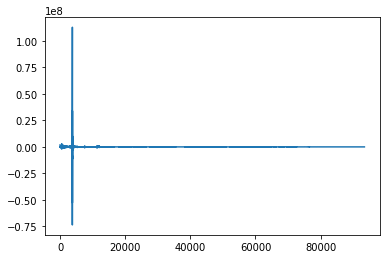

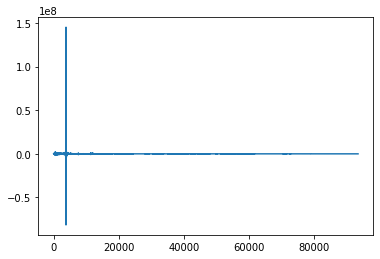

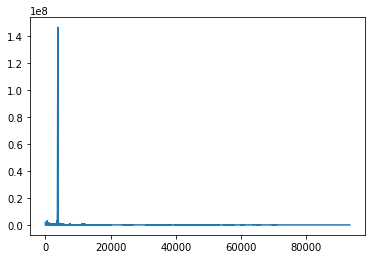

In [ ]:
sprectral_analysis=np.fft.rfft(data)
Real_X=sprectral_analysis.real
Imag_X=-sprectral_analysis.imag
Mg_X=np.sqrt(Real_X*Real_X+(Imag_X*Imag_X))
plt.plot(Real_X)
plt.show()
plt.plot(Imag_X)
plt.show()
plt.plot(Mg_X)
plt.show()

**Task Explanation:**
<br> To find the frequency of signals the max frequency of the combined real and imaginary compoent of the signals were taken. Since the signals were sampled at a sample rate and the sample frequency is usally the twice the frequency of the original signal, in that way we got the original signal which was then multipled by the sampling rate and divided accross the length of the original signal. In this way we got the original frequency.

In [ ]:
frequency=np.argmax(Mg_X)
length=len(Mg_X)
sampling_frequency=frequency/2
sampling_frequency=sampling_frequency*samplerate
frequency=sampling_frequency/length
frequency

447.07426314775574

b. To get a clean spectrum, you can first multiply the time domain signal with a
hamming window using the function numpy.hamming. To make the spectrum signal
smoother, you can take multiple time-domain signal chunks, then find each of their
spectrum and then average them.

Task Explanation:
<br> The original signal was multiplied with the hamming signal which was formed using the numpy. hamming function.

In [ ]:
a=np.split(data,2)

In [ ]:
a[0]

array([ -69,  -29,  -28, ..., 2498, 2615, 2715], dtype=int16)

In [ ]:
data1=np.subtract(data,19)

In [ ]:
window=np.hamming(93437)
signal=np.multiply(a[0], window)
#x,y=myDFT(signal)
signal1=np.array_split(signal,32)

The signal was divided into two equal halves, and was multiplied with corresponding hamming window. Afterwards, the average of the output was taken.

In [ ]:
x1,y1=myDFT(signal1[0])


Using From Scratch Build DFT:

[1993.7313959  1993.7313959  1993.7313959  ... 1993.73139589 1993.73139587
 1993.73139589] 
 [0.00000000e+00 9.14582612e-07 1.82916522e-06 ... 6.37537634e-04
 7.52661522e-03 1.37564509e-03]


Here the Time domain signal was divided into equal portion of 32 chunks using the numpy.splt function and after that each chunk was added to the real and imaginary portion of the function

In [ ]:
for i in range(0,32):
  x,y=myDFT(signal1[i])
  #x1=np.add(x1,x)
  #y1=np.add(y1,y)

Using From Scratch Build DFT:

[1993.7313959  1993.7313959  1993.7313959  ... 1993.73139589 1993.73139587
 1993.73139589] 
 [0.00000000e+00 9.14582612e-07 1.82916522e-06 ... 6.37537634e-04
 7.52661522e-03 1.37564509e-03]
Using From Scratch Build DFT:

[8444.51096166 8444.51096166 8444.51096166 ... 8444.51096167 8444.51096162
 8444.51096159] 
 [ 0.00000000e+00  1.60224826e-05  3.20449651e-05 ... -2.07842024e-02
  2.37856992e-02  3.69043478e-03]
Using From Scratch Build DFT:

[20498.71251807 20498.71251807 20498.71251807 ... 20498.71251788
 20498.71251802 20498.71251811] 
 [0.00000000e+00 3.97838689e-05 7.95677377e-05 ... 1.38948798e-01
 5.09304725e-02 3.98894180e-03]
Using From Scratch Build DFT:

[-19150.3390973  -19150.3390973  -19150.3390973  ... -19150.33909717
 -19150.33909716 -19150.33909722] 
 [ 0.00000000e+00 -4.46491274e-05 -8.92982548e-05 ... -9.09413006e-02
 -6.40845177e-02 -5.29016278e-03]
Using From Scratch Build DFT:

[-14498.99064081 -14498.99064081 -14498.99064081 ... -1

Since it was very explensive o(N^2) complexity to directly put the signal for DFT, the signal was divided into 32 chunk using the array split function and afterwards for each chunk of TDS signal the X and Y part of the DFT signal was calculated.

In [ ]:
x1=x1/32 #used for averaging
y1=y1/32

#Task 3

Re-do the spectral analysis of the given sound signal with your own functions that you
implemented for task 1. First, convert the time-domain signal into frequency domain.
Then, express the frequency domain signal in its polar representation. Look at the
magnitude array to find the frequency composition of the signal.

Task Explanation:
<br> This is similar to the first task where in this case we are calling our built in function with the original function of dft and idft. But since the original signal DFT is very time consuming due to the high runtime complexity, in this case the signal has been divided into 32 chunk using array_split and then for each split the corresponding DFT built in and the one built from scratch was checked. This was done for the rest of the task as well. Due to huge runtime complexity only a portion of the executed code is shown.

In [ ]:
signal=np.array_split(data,50)
for i in range(0,10):
  x,y=myDFT(signal[i])
  print("\nComparing it with built in DFT function\n")
  spectral_analysis2=np.fft.rfft(signal[i])
  print(spectral_analysis2.real,'\n', spectral_analysis2.imag)

Using From Scratch Build DFT:

[35678.         35678.         35678.         ... 35677.99999997
 35677.99999984 35677.99999997] 
 [ 0.00000000e+00 -5.31667816e-05 -1.06333563e-04 ... -4.58009437e-02
 -6.68293308e-02 -2.23236775e-02]

Comparing it with built in DFT function

[35824.         -5583.8850563   2874.71662382 ...  -131.12515994
  -118.8432425   -124.        ] 
 [    0.          1533.93406673 -2803.80416307 ...    -4.22086897
     8.09913955     0.        ]
Using From Scratch Build DFT:

[260284.         260284.         260284.         ... 260283.99999509
 260283.9999973  260283.99999427] 
 [ 0.00000000e+00 -4.21090782e-04 -8.42181564e-04 ... -2.77631955e-01
 -4.78000966e-01 -2.84821474e-02]

Comparing it with built in DFT function

[256418.          21116.00251245  68665.4894137  ...   2299.21955088
   2266.90192481   2308.        ] 
 [ 0.00000000e+00  6.38020338e+04 -9.64836244e+03 ... -1.25880880e+01
  5.52163293e+00  0.00000000e+00]
Using From Scratch Build DFT:

[-15360. 

Using From Scratch Build DFT:

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.] 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Comparing it with built in DFT function

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32.] 
 [ 0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]
Using My built in Inverse Transformation:

[ 3.01176471e+01  1.86632762e+00 -1.81879739e+00  1.74138083e+00
 -1.63671428e+00  1.50836201e+00 -1.36069492e+00  1.19874164e+00
 -1.02801728e+00  8.54335662e-01 -6.83611303e-01  5.21658018e-01
 -3.73990930e-01  2.45638666e-01 -1.40972108e-01  6.35555488e-02
 -1.60253179e-02  0.00000000e+00 -1.60253179e-02  6.35555488e-02
 -1.40972108e-01  2.45638666e-01 -3.73990930e-01  5.21658018e-01
 -6.83611303e-01  8.54335662e-01 -1.02801728e+00  1.19874164e+00
 -1.36069492e+00  1.50836201e+00 -1.63671428e+00  1.74138083e+00
 -1.81879739e+00  0.00000000e+00]


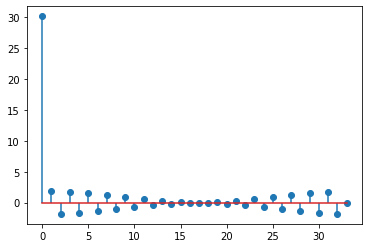

In [ ]:
TDS=np.zeros(32)
TDS[0]=32
x,y=myDFT(TDS)
print("\nComparing it with built in DFT function\n")
spectral_analysis2=np.fft.rfft(TDS)
print(spectral_analysis2.real,'\n', spectral_analysis2.imag)
TDS=myIDFT(spectral_analysis2.real, spectral_analysis2.imag)

Due to high complexity, in case of inverse, a demo using a small signal was shown which proves that my inverse function is working correctly.

Using From Scratch Build DFT:

[30.13367238 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238
 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238
 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238 30.13367238] 
 [ 0.00000000e+00 -1.77959867e-13 -3.55919734e-13 -4.80852202e-12
 -7.11839467e-13 -7.19135863e-12 -9.61704404e-12  3.68153266e-12
 -1.42367893e-12 -6.45722860e-12 -1.43827173e-11 -3.07262462e-11
 -1.92340881e-11  4.02114687e-11  7.36306531e-12  1.37556364e-11
 -2.84735787e-12  6.87036390e-12]
The phase values are placed in vectors as:

[1.57079533 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533
 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533
 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533 1.57079533]


<Figure size 432x288 with 0 Axes>

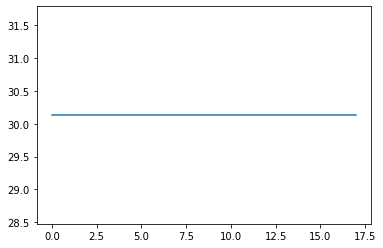

<Figure size 432x288 with 0 Axes>

In [ ]:
ReX, ImX=myDFT(TDS)
MgX= Rect2Polar(ReX, ImX)
plt.plot(MgX)
plt.figure()

#Task 4

Intially we build the signal just as mentioned in the question

<StemContainer object of 3 artists>

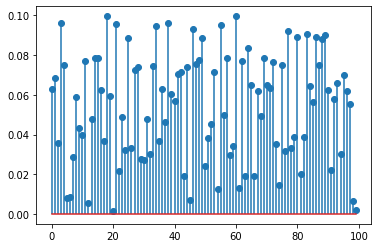

In [ ]:
freq=1
amplitude=0.1
t=np.linspace(0,5,100)
wave=amplitude*np.sin(2*np.pi*freq*t)
noise=amplitude*np.random.rand(len(wave))
plt.stem(noise)

After that, using a random value the noise was added to the signal, in the noise variable. Afterwards, the noise signal was combined with the original wave signal

<StemContainer object of 3 artists>

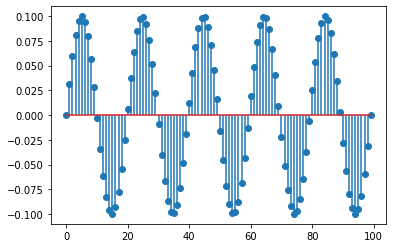

In [ ]:
t2=np.linspace(0,15,100)
freq=1
amplitude=0.1
wave2=amplitude*np.sin(2*np.pi*freq*t)
plt.stem(wave2)

Here the built in convolve function was used to convolve the noise signal and my original wave signal.

<StemContainer object of 3 artists>

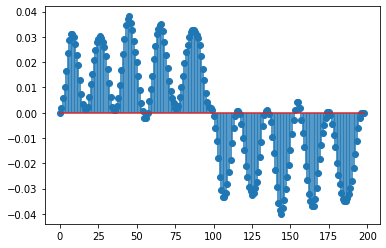

In [ ]:
wave3=np.convolve(noise, wave2)
plt.stem(wave3)

This is the convolve signal built from scratch. In the convolve signal, the input signal and the impulse response is given as input. then firstly iterating throug the input signal, for each value of input signal, it was multipled with each values of the impulse signal through the second loop. The summation of the products were kept in the designated array

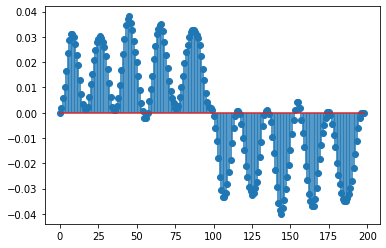

In [ ]:
def Convolution(inp, impulse):
    output = np.zeros(len(inp) + len(impulse) - 1)
    for i in range(0, len(inp)):
        for j in range(0, len(impulse)):
            output[i+j] = output[i+j] + (inp[i] * impulse[j])

    plt.stem(output)
Convolution(noise, wave2)